In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("janiobachmann/bank-marketing-dataset")

print("Path to dataset files:", path)

100%|██████████| 142k/142k [00:00<00:00, 403kB/s]

Extracting files...
Path to dataset files: C:\Users\Spandana\.cache\kagglehub\datasets\janiobachmann\bank-marketing-dataset\versions\1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

filepath = 'bank.csv'

def load_data(filepath):
    """Load the dataset from a CSV file."""
    return pd.read_csv(filepath)

def handle_missing_values(df):
    """Handle missing values in the DataFrame."""
    # For simplicity, fill missing values with the mode for categorical columns
    for column in df.select_dtypes(include=['object']):
        df[column].fillna(df[column].mode()[0], inplace=True)
    
    # For numerical columns, fill with mean (customize as necessary)
    for column in df.select_dtypes(include=[np.number]):
        df[column].fillna(df[column].mean(), inplace=True)

    return df

def encode_categorical_variables(df):
    """Encode categorical variables using One-Hot Encoding."""
    categorical_cols = df.select_dtypes(include=['object']).columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

def scale_numerical_features(df):
    """Scale numerical features using Min-Max Scaling."""
    scaler = MinMaxScaler()
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

def preprocess_data(filepath):
    """Load, clean, and preprocess the data."""
    df = load_data(filepath)
    df = handle_missing_values(df)
    df = encode_categorical_variables(df)
    df = scale_numerical_features(df)
    return df

df_preprocessed = preprocess_data(filepath)
print(df_preprocessed.head())


        age   balance       day  duration  campaign  pdays  previous  \
0  0.532468  0.104371  0.133333  0.268110  0.000000    0.0       0.0   
1  0.493506  0.078273  0.133333  0.377675  0.000000    0.0       0.0   
2  0.298701  0.092185  0.133333  0.357566  0.000000    0.0       0.0   
3  0.480519  0.105882  0.133333  0.148750  0.000000    0.0       0.0   
4  0.467532  0.079851  0.133333  0.172983  0.016129    0.0       0.0   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
0            False             False          False  ...      False   
1            False             False          False  ...      False   
2            False             False          False  ...      False   
3            False             False          False  ...      False   
4            False             False          False  ...      False   

   month_mar  month_may  month_nov  month_oct  month_sep  poutcome_other  \
0      False       True      False      False      False        

C:\Users\Spandana\AppData\Local\Temp\ipykernel_4584\3193765478.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\Spandana\AppData\Local\Temp\ipykernel_4584\3193765478.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [8]:
df = load_data(filepath)


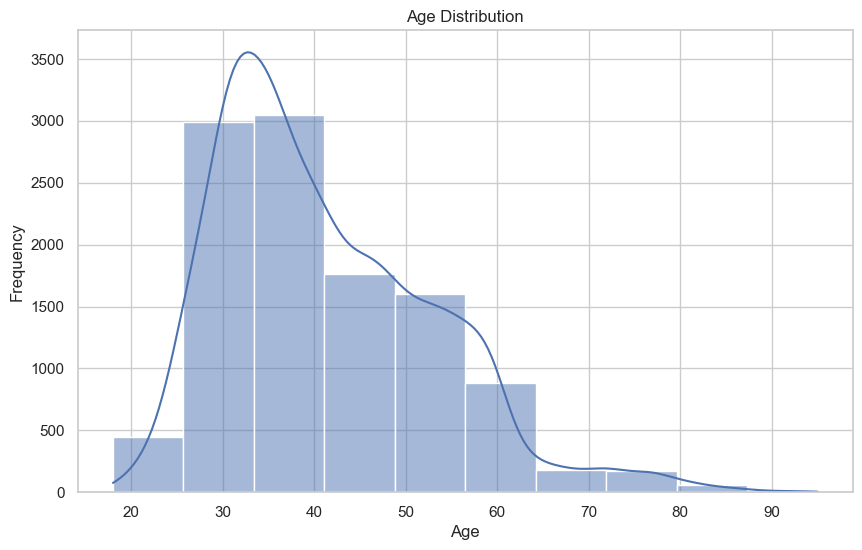

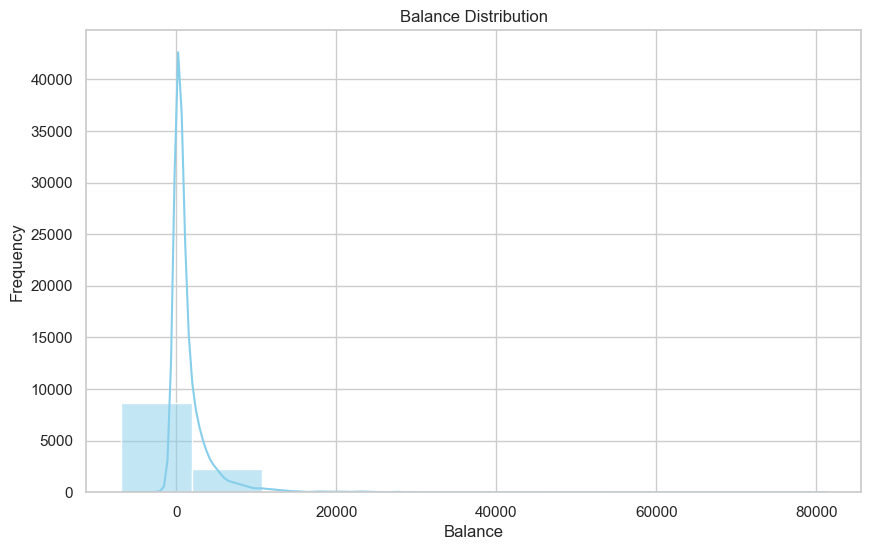

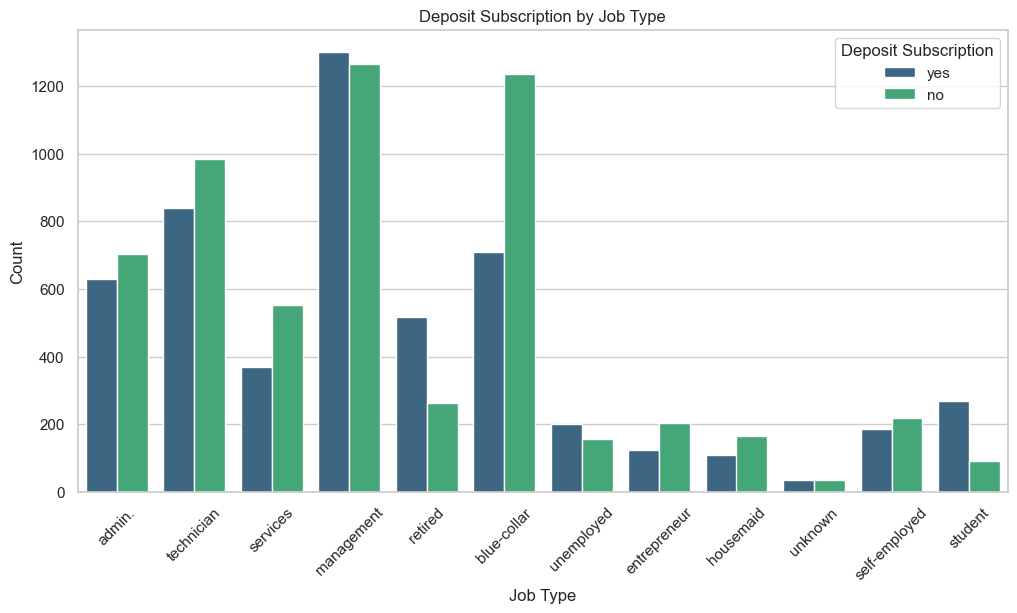

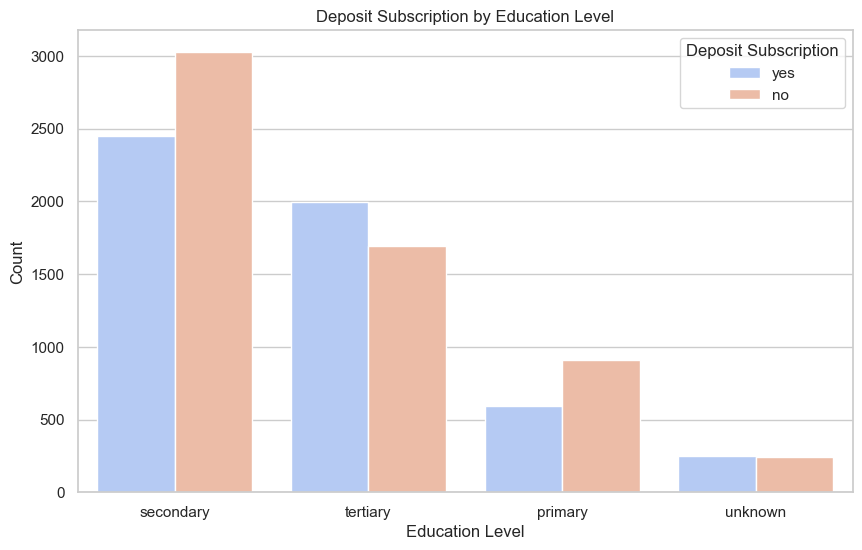

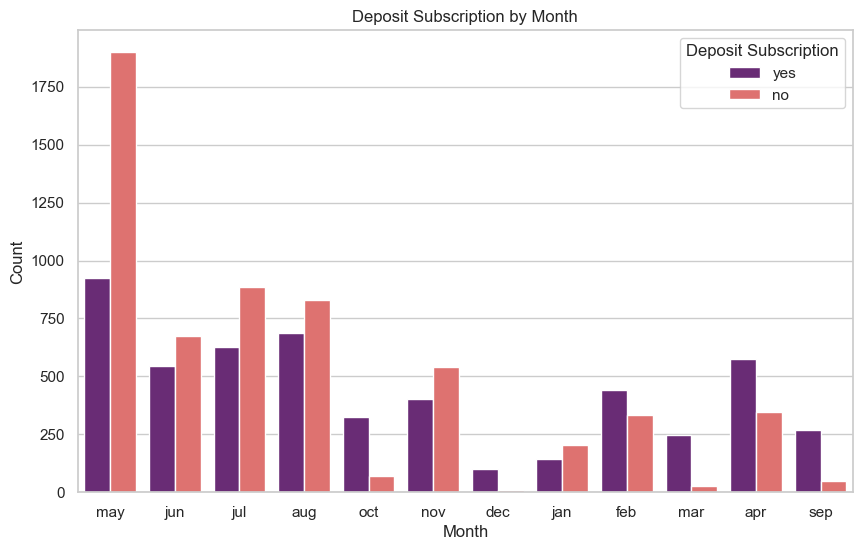

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = df.copy()
# Set the plot style
sns.set(style="whitegrid")

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Balance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['balance'], bins=10, kde=True, color='skyblue')
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# 3. Deposit Subscription Rate by Job Type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='job', hue='deposit', palette='viridis')
plt.title('Deposit Subscription by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Deposit Subscription', loc='upper right')
plt.xticks(rotation=45)
plt.show()

# 4. Deposit Subscription by Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='education', hue='deposit', palette='coolwarm')
plt.title('Deposit Subscription by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Deposit Subscription', loc='upper right')
plt.show()

# 5. Deposit Subscription by Contact Month
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', hue='deposit', palette='magma')
plt.title('Deposit Subscription by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Deposit Subscription', loc='upper right')
plt.show()
